In [1]:
%cd ..
from src.utils import import_mesh
from src.models.cell_models import ReparametrizedFitzHughNagumo
from src.models.dynamics_models import BidomainModel
import numpy as np
import ufl

/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva


# Testing the model on a coarse 2D slice of a heart

In [2]:
domain = import_mesh("data/coarse_slice.xdmf")
x = ufl.SpatialCoordinate(domain)
cell_model = ReparametrizedFitzHughNagumo()


class Model(BidomainModel):
    def __init__(
        self,
    ):
        pass

    def initial_V_m(self):
        return lambda x: (x[0] + 1.5) ** 2 + (x[1] - 1.5) ** 2 < 0.2**2, 0.0

    def ischemia(self):
        return (
            lambda x: (x[0] - 1.3) ** 2 / 2 + (x[1] - 2.2) ** 2 / 15 < 0.2**2,
            self.M_i/10,
            self.M_e/10,
        )


model = Model()
model.setup(domain, [0, 0, 0], [0, 0, 0])

In [3]:
model.d = 3
model.solve(
    T=1000,
    steps=500,
    cell_model=cell_model,
    gif_name="2D_slice_coarse.gif",
    signal_point=[-1.5, -0.7, 4.5],
)

Solving problem: 100%|██████████| 500/500 [00:39<00:00, 12.82it/s]


### Plotting a transmembrane potential in a given signal point

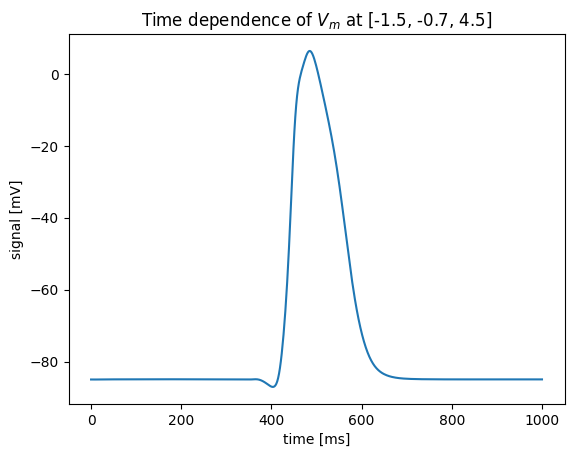

In [4]:
model.plot_signal()